In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from classes import *

In [6]:
DTYPE = np.float32

In [ ]:
path = r'\Deep-Learning\datasets\digits'
path_train = path + r'\train.csv'
path_test = path + r'\test.csv'

In [8]:
data_train = np.array(pd.read_csv(path_train))
data_test = np.array(pd.read_csv(path_test))

In [9]:
def one_hot(data, num_classes):
    new_data = np.zeros((data.shape[0], num_classes))
    new_data[np.arange(data.shape[0]), data] = 1
    return new_data

In [10]:
x_train, y_train = data_train[:, 1:] / 255.0, one_hot(data_train[:, 0], 10)

In [11]:
x_test = data_test / 255.0

In [12]:
x_train, y_train = x_train.astype(DTYPE), y_train.astype(DTYPE)
x_test = x_test.astype(DTYPE)

In [13]:
model = DNN(
    neurons=(x_train.shape[1], 64, 32, y_train.shape[1]),
    activations=(ReLU(), ReLU(), Softmax()),
    name='digits_classifier'
)

In [14]:
model.compile(
    loss=CategoricalCrossEntropy(),
    optimizer=Adam(),
    accuracy=CategoricalAccuracy()
)

In [15]:
model.train(
    x=x_train,
    y=y_train,
    epochs=10,
    batch_size=32,
    verbose=True,
    print_every=2
)

Epoch: 2, Loss: 0.14570773726276123, Acc: 0.9560714285714286
Epoch: 4, Loss: 0.0832949856708168, Acc: 0.9739285714285715
Epoch: 6, Loss: 0.05427514893784757, Acc: 0.9834285714285714
Epoch: 8, Loss: 0.03626971378590178, Acc: 0.9888095238095238
Epoch: 10, Loss: 0.0261426049527011, Acc: 0.9922619047619048


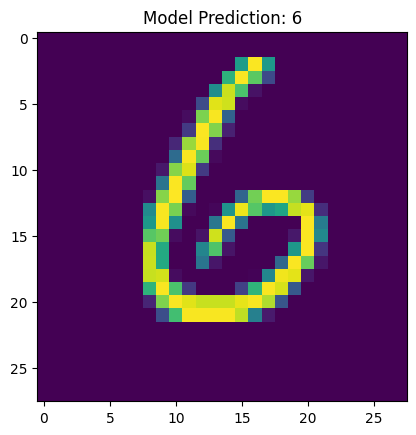

In [20]:
random_idx = np.random.randint(0, x_test.shape[0])
random_image = x_test[random_idx]
model_prediction = np.argmax(model.forward(random_image))
plt.imshow(random_image.reshape(28, 28))
plt.title(f'Model Prediction: {model_prediction}')
plt.show()